# This project aimed  to build and train a Convolutional Neural Network (CNN) from scratch to classify 60,000 color images from the CIFAR-10 dataset into 10 object categories

In [1]:
# import all necessary libraries
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# load CIFAR10 data
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Data Understanding

In [3]:
# check shape of data
print(f"shape of training data: {xtrain.shape}")
print(f"shape of validation data: {xtest.shape}")

shape of training data: (50000, 32, 32, 3)
shape of validation data: (10000, 32, 32, 3)


Data Preprocessing

In [4]:
# typecasting of data
xtrain = xtrain.astype("float32")
xtest = xtest.astype("float32")

In [5]:
# normalize data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

Model Building

In [6]:
# creating sequential model
model = Sequential()

# add convolutional layers
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# add flatten layer
model.add(Flatten())

# add fully dense layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [9]:
history = model.fit(xtrain, ytrain, epochs=20, validation_data=(xtest, ytest), verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2992 - loss: 1.8782 - val_accuracy: 0.5592 - val_loss: 1.2410
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5387 - loss: 1.2962 - val_accuracy: 0.6202 - val_loss: 1.0748
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6032 - loss: 1.1221 - val_accuracy: 0.6422 - val_loss: 1.0122
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6432 - loss: 1.0118 - val_accuracy: 0.6800 - val_loss: 0.9116
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6818 - loss: 0.9301 - val_accuracy: 0.6976 - val_loss: 0.8713
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7009 - loss: 0.8568 - val_accuracy: 0.6974 - val_loss: 0.8688
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7168 - loss: 0.8073 - val_accuracy: 0.7082 - val_loss: 0.8502
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7365 - loss: 0.76

Mosel Evaluation

In [10]:
loss, accuracy = model.evaluate(xtest, ytest)
print(f"Log loss: {loss}")
print(f"accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7312 - loss: 0.9209
Log loss: 0.9136627912521362
accuracy: 0.7324000000953674


Data Visualization

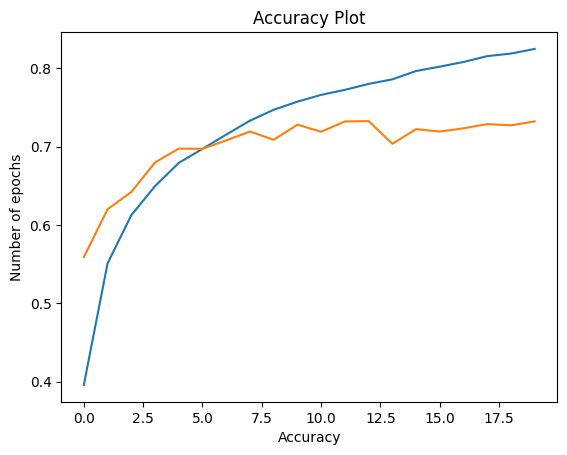

In [11]:
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Number of epochs")
plt.title("Accuracy Plot")
plt.show()

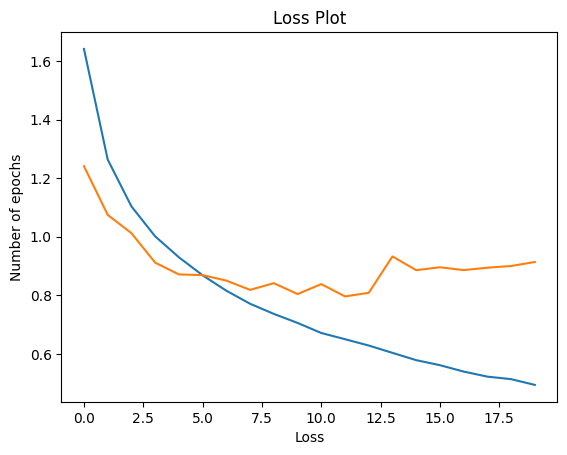

In [12]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Loss")
plt.ylabel("Number of epochs")
plt.title("Loss Plot")
plt.show()